<a href="https://colab.research.google.com/github/Misha-private/Demo-repo/blob/main/NN_extensions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

iter, MSE = 0 ... 0.16321704336705728
iter, MSE = 2 ... 0.061879885289658654
iter, MSE = 4 ... 0.060526492825785795
iter, MSE = 6 ... 0.05936034168156177
iter, MSE = 8 ... 0.05812205058467575
iter, MSE = 10 ... 0.05671154028261166
iter, MSE = 12 ... 0.05505374669834019
iter, MSE = 14 ... 0.05307818276491512
iter, MSE = 16 ... 0.05071718856186935
iter, MSE = 18 ... 0.04791417381094818
iter, MSE = 20 ... 0.044641545659513795
iter, MSE = 22 ... 0.040926034321792024
iter, MSE = 24 ... 0.036871672542516096
iter, MSE = 26 ... 0.0326626056489159
iter, MSE = 28 ... 0.028530568821892765
iter, MSE = 30 ... 0.02469328411624922
iter, MSE = 32 ... 0.02129606936410841
iter, MSE = 34 ... 0.01838989685581566
iter, MSE = 36 ... 0.015950153424139153
iter, MSE = 38 ... 0.013913328946042774
iter, MSE = 40 ... 0.012208027972424422
iter, MSE = 42 ... 0.010771859498432918
iter, MSE = 44 ... 0.009557652879427555
iter, MSE = 46 ... 0.008535873668513739
iter, MSE = 48 ... 0.007699317135346698
iter, MSE = 50 ...

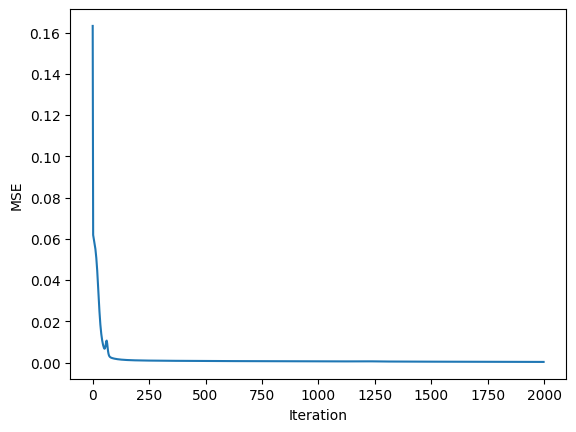

In [15]:
#
# Using four output layers
# Three layers
#
import numpy as np
from numpy import exp, array, random, dot

class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):
        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1


class NeuralNetwork():

    def __init__(self, layer1, layer2, layer3):
        self.layer1 = layer1
        self.layer2 = layer2
        self.layer3 = layer3

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, err_acum,iter_acum,
              number_of_training_iterations, iteration_increment):

        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network
            output_from_layer_1, output_from_layer_2, output_from_layer_3 = self.think(training_set_inputs)


            layer3_error = training_set_outputs  - output_from_layer_3
            layer3_delta = layer3_error * self.__sigmoid_derivative(output_from_layer_3)

            if iteration%iteration_increment==0 :
              mse = np.mean(layer3_error**2)
              err_acum.append(mse)
              iter_acum.append(iteration)

              print(f"iter, MSE = {iteration} ... {mse}")


            layer2_error = layer3_delta.dot(self.layer3.synaptic_weights.T)
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)

            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)


            # Calculate how much to adjust the weights by
            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)
            layer3_adjustment = output_from_layer_2.T.dot(layer3_delta)

            # Adjust the weights.
            self.layer1.synaptic_weights += layer1_adjustment *0.9
            self.layer2.synaptic_weights += layer2_adjustment *0.9
            self.layer3.synaptic_weights += layer3_adjustment *0.9

    # Plot MSE
    def plot_mse(self, err_acum, iter_acum):
      import matplotlib.pyplot as plt
      plt.plot(iter_acum, err_acum)
      plt.xlabel('Iteration')
      plt.ylabel('MSE')

    # The neural network thinks.
    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs, self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        output_from_layer3 = self.__sigmoid(dot(output_from_layer2, self.layer3.synaptic_weights))
        return output_from_layer1, output_from_layer2, output_from_layer3

    # The neural network prints its weights
    def print_weights(self):
        print ("    Input layer (9 neurons each with 10 examples and 10 outputs)")
        print ("    Layer 1 (`` neurons, each with 10 inputs): ")
        print (self.layer1.synaptic_weights)
        print ("    Layer 2 (4 neurons, with 10 inputs):")
        print (self.layer2.synaptic_weights)
        print ("    Layer 3 (1 neuron, with 4 inputs):")
        print (self.layer3.synaptic_weights)

#
# Main program
#

if __name__ == "__main__":

    #Seed the random number generator
    random.seed(1)

    # Create layer 1 (10 neurons, each with 9 inputs)
    layer1 = NeuronLayer(10, 9)

    # Create layer 2 (10 neurons with 10 inputs)
    layer2 = NeuronLayer(8, 10)

    # Create layer 3 (4 neuron with 10 inputs)
    layer3 = NeuronLayer(4, 8)


    # Combine the layers to create a neural network
    neural_network = NeuralNetwork(layer1, layer2, layer3)

    #print ("Stage 1) Random starting synaptic weights: ")
    #neural_network.print_weights()

    # The training set. We have 10 examples, each consisting of 9 input values
    # and 3 output values.
    training_set_inputs = array([
    [0.009, 0.048, 0.285, 0.018, 0.097, 0.571, 0.027, 0.145, 0.856],
     [0.112, 0.162, 0.014, 0.409, 0.458, 0.310, 0.902, 0.952, 0.804],
     [0.007, 0.006, 0.012, 0.000, 0.154, 0.309, 0.000, 0.500, 1.000],
     [0.010, 0.070, 0.099, 0.070, 0.140, 0.169, 0.099, 0.169, 0.198],
     [0.198, 0.148, 0.049, 0.148, 0.123, 0.074, 0.049, 0.074, 0.123],
     [0.013, 0.036, 0.013, 0.036, 0.099, 0.036, 0.013, 0.036, 0.013],
     [0.099, 0.049, 0.020, 0.049, 0.033, 0.016, 0.020, 0.016, 0.011],
     [0.700, 0.049, 0.198, 0.049, 0.074, 0.148, 0.079, 0.089, 0.119],
     [0.044, 0.083, 0.090, 0.000, 0.166, 0.148, 0.180, 0.249, 0.269],
     [0.494, 0.329, 0.055,0.329, 0.226, 0.040, 0.165, 0.119, 0.023] ])

    # Mean, Max, Min, Max-Min
    '''
    Mean= 0.217
    Max= 0.506
    Min= 0.025
    Max - Min= 0.481
    '''
    training_set_outputs = array([[ 0.228 ,0.458 ,0.221 ,0.114 ,0.110 ,0.033 ,0.035 ,0.167 ,0.137 ,0.198 ],
                                  [ 0.856 ,0.952 ,1.000 ,0.198 ,0.198 ,0.099 ,0.099 ,0.700 ,0.269 ,0.494],
                                  [ 0.009 ,0.014 ,0.000 ,0.010 ,0.049 ,0.013 ,0.011 ,0.049 ,0.000 ,0.023 ],
                                  [ 0.847 ,0.938 ,1.000 ,0.188 ,0.149 ,0.086 ,0.088 ,0.651 ,0.269 ,0.471 ]]).T

    # Train the neural network using the training set
    # Do it 60,000 times and make small adjustments each time.

    err_acum = []
    iter_acum = []

    neural_network.train(training_set_inputs, training_set_outputs, err_acum, iter_acum,
                         iteration_increment=2, number_of_training_iterations=2000)
    neural_network.plot_mse(err_acum, iter_acum)

    #print("Stage 2) New synaptic weights after training: ")
    #neural_network.print_weights()

    # Test the neural network with a new situation.
    print ("Stage 3) Considering a new situation [0.296, 0.025, 0.506, 0.246, 0.042, 0.444, 0.216, 0.037] -> ?: ")
    hidden_stata1,hidden_state2, output = neural_network.think(array([0.296, 0.144, 0.025, 0.506, 0.246, 0.042, 0.444, 0.216, 0.037]))
    print('True values: 0.217, 0.506, 0.025, 0.481')
    print(output)